# lstm

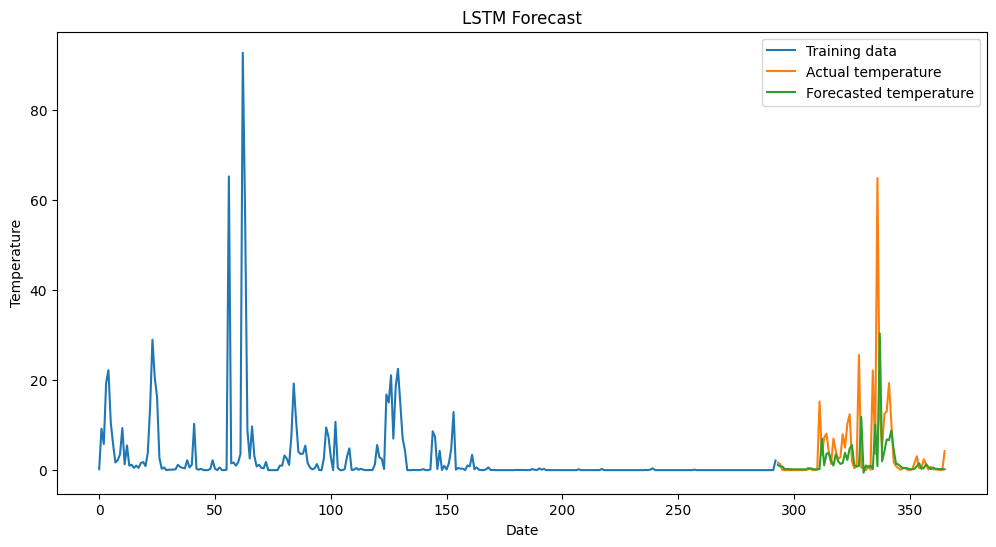

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Input # type: ignore
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load temperature data
temperature_data = pd.read_csv('temp.csv', parse_dates=True)
temperature_data = temperature_data.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data['temperature'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length and split data
sequence_length = 5  # Adjust as needed
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(Input((X_train.shape[1], 1)))
model.add(LSTM(64))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predictions
y_pred = model.predict(X_test, verbose=0)

# Inverse transform predictions to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index[:-len(y_test)], temperature_data['temperature'][:-len(y_test)], label='Training data')
plt.plot(temperature_data.index[-len(y_test):], temperature_data['temperature'][-len(y_test):], label='Actual temperature')
plt.plot(temperature_data.index[-len(y_test):], y_pred_inv, label='Forecasted temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

# lstm for forecasting

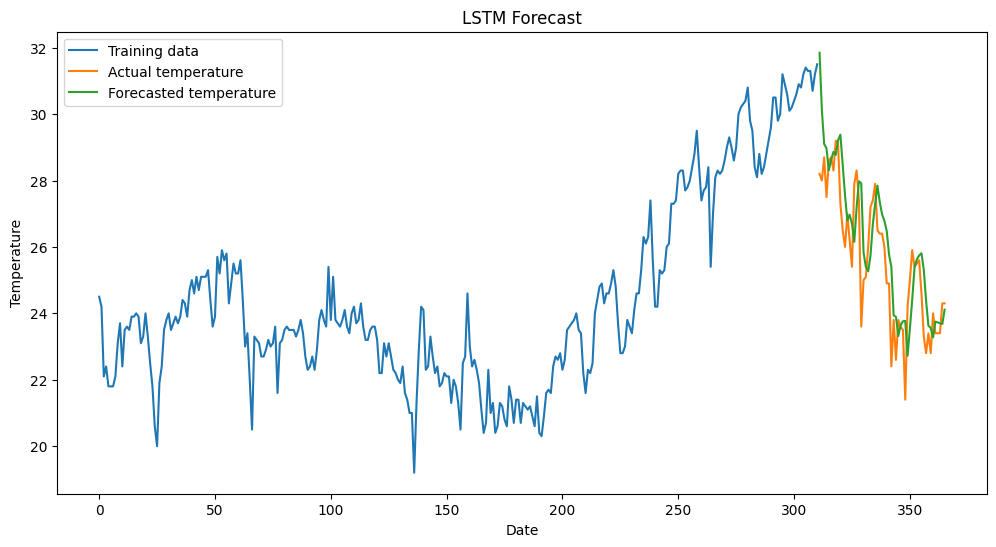

In [7]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Input # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

# Load temperature data
data = pd.read_csv('1-year-daily-weather-data.csv', parse_dates=True)
temperature_data = data.dropna()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data['temperature'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define sequence length and split data
sequence_length = 5  # Adjust as needed
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Reshape data for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(Input((sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(128))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predictions
y_pred = model.predict(X_test, verbose=0)

# Inverse transform predictions to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.index[:-len(y_test)], temperature_data['temperature'][:-len(y_test)], label='Training data')
plt.plot(temperature_data.index[-len(y_test):], temperature_data['temperature'][-len(y_test):], label='Actual temperature')
plt.plot(temperature_data.index[-len(y_test):], y_pred_inv, label='Forecasted temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

# forecasting using linear regression

In [10]:
import pandas as pd
df = pd.read_csv('1-year-daily-weather-data.csv')
df

,date,temperature,rainfall,humidity
0,2023-07-01,24.5,0.20,68
1,2023-07-02,24.2,9.20,66
2,2023-07-03,22.1,5.80,81
3,2023-07-04,22.4,19.40,81
4,2023-07-05,21.8,22.20,78
...,...,...,...,...
361,2024-06-26,23.4,0.16,74
362,2024-06-27,23.4,0.09,72
363,2024-06-28,23.4,0.04,70
364,2024-06-29,24.3,0.05,70


In [11]:
temperature_data = df['temperature']
temperature_data

0      24.5
1      24.2
2      22.1
3      22.4
4      21.8
       ... 
361    23.4
362    23.4
363    23.4
364    24.3
365    24.3
Name: temperature, Length: 366, dtype: float64

In [12]:
import numpy as np
temperature_data = np.array(temperature_data)
temperature_data

array([24.5, 24.2, 22.1, 22.4, 21.8, 21.8, 21.8, 22.1, 23.1, 23.7, 22.4,
       23.5, 23.6, 23.5, 23.9, 23.9, 24. , 23.9, 23.1, 23.3, 24. , 23.3,
       22.5, 21.8, 20.6, 20. , 21.9, 22.4, 23.5, 23.8, 24. , 23.5, 23.7,
       23.9, 23.7, 23.9, 24.4, 24.3, 23.9, 24.7, 25. , 24.6, 25.1, 24.7,
       25.1, 25.1, 25.1, 25.3, 24.4, 23.6, 23.9, 25.7, 25.2, 25.9, 25.6,
       25.8, 24.3, 24.9, 25.5, 25.2, 25.2, 25.6, 24.4, 23. , 23.4, 22. ,
       20.5, 23.3, 23.2, 23.1, 22.7, 22.7, 22.9, 23.2, 23. , 23.1, 23.6,
       21.6, 23.1, 23.2, 23.5, 23.6, 23.5, 23.5, 23.5, 23.3, 23.5, 23.8,
       23.4, 22.7, 22.3, 22.4, 22.7, 22.3, 22.9, 23.8, 24.1, 23.8, 23.6,
       25.4, 23.8, 25.1, 23.8, 23.7, 23.6, 23.8, 24.1, 23.6, 23.4, 24. ,
       24.2, 23.7, 23.8, 24.3, 23.6, 23.2, 23.2, 23.5, 23.6, 23.6, 23.2,
       22.2, 22.2, 23.1, 22.7, 23.1, 22.7, 22.3, 22.2, 22. , 21.9, 22.4,
       21.6, 21.4, 21. , 21. , 19.2, 21.3, 22.9, 24.2, 24.1, 22.3, 22.4,
       23.3, 22.7, 22.2, 22.4, 21.8, 21.9, 22.2, 22

In [13]:
len(temperature_data)

366

In [14]:
temperature_data.shape

(366,)

In [15]:
def create_sequences(data, seq_length = 5):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

In [16]:
X, y = create_sequences(temperature_data)
display(X)
display(y)

array([[24.5, 24.2, 22.1, 22.4, 21.8],
       [24.2, 22.1, 22.4, 21.8, 21.8],
       [22.1, 22.4, 21.8, 21.8, 21.8],
       ...,
       [23.4, 22.8, 24. , 23.4, 23.4],
       [22.8, 24. , 23.4, 23.4, 23.4],
       [24. , 23.4, 23.4, 23.4, 24.3]])

array([21.8, 21.8, 22.1, 23.1, 23.7, 22.4, 23.5, 23.6, 23.5, 23.9, 23.9,
       24. , 23.9, 23.1, 23.3, 24. , 23.3, 22.5, 21.8, 20.6, 20. , 21.9,
       22.4, 23.5, 23.8, 24. , 23.5, 23.7, 23.9, 23.7, 23.9, 24.4, 24.3,
       23.9, 24.7, 25. , 24.6, 25.1, 24.7, 25.1, 25.1, 25.1, 25.3, 24.4,
       23.6, 23.9, 25.7, 25.2, 25.9, 25.6, 25.8, 24.3, 24.9, 25.5, 25.2,
       25.2, 25.6, 24.4, 23. , 23.4, 22. , 20.5, 23.3, 23.2, 23.1, 22.7,
       22.7, 22.9, 23.2, 23. , 23.1, 23.6, 21.6, 23.1, 23.2, 23.5, 23.6,
       23.5, 23.5, 23.5, 23.3, 23.5, 23.8, 23.4, 22.7, 22.3, 22.4, 22.7,
       22.3, 22.9, 23.8, 24.1, 23.8, 23.6, 25.4, 23.8, 25.1, 23.8, 23.7,
       23.6, 23.8, 24.1, 23.6, 23.4, 24. , 24.2, 23.7, 23.8, 24.3, 23.6,
       23.2, 23.2, 23.5, 23.6, 23.6, 23.2, 22.2, 22.2, 23.1, 22.7, 23.1,
       22.7, 22.3, 22.2, 22. , 21.9, 22.4, 21.6, 21.4, 21. , 21. , 19.2,
       21.3, 22.9, 24.2, 24.1, 22.3, 22.4, 23.3, 22.7, 22.2, 22.4, 21.8,
       21.9, 22.2, 22.1, 22.1, 21.3, 22. , 21.8, 21

In [17]:
display(X.shape)
display(y.shape)

(361, 5)

(361,)

In [18]:
df = pd.DataFrame(X, columns=['lag1', 'lag2', 'lag3', 'lag4', 'lag5'])
df

,lag1,lag2,lag3,lag4,lag5
0,24.5,24.2,22.1,22.4,21.8
1,24.2,22.1,22.4,21.8,21.8
2,22.1,22.4,21.8,21.8,21.8
3,22.4,21.8,21.8,21.8,22.1
4,21.8,21.8,21.8,22.1,23.1
...,...,...,...,...,...
356,23.3,22.8,23.4,22.8,24.0
357,22.8,23.4,22.8,24.0,23.4
358,23.4,22.8,24.0,23.4,23.4
359,22.8,24.0,23.4,23.4,23.4


In [19]:
df['target'] = y
df

,lag1,lag2,lag3,lag4,lag5,target
0,24.5,24.2,22.1,22.4,21.8,21.8
1,24.2,22.1,22.4,21.8,21.8,21.8
2,22.1,22.4,21.8,21.8,21.8,22.1
3,22.4,21.8,21.8,21.8,22.1,23.1
4,21.8,21.8,21.8,22.1,23.1,23.7
...,...,...,...,...,...,...
356,23.3,22.8,23.4,22.8,24.0,23.4
357,22.8,23.4,22.8,24.0,23.4,23.4
358,23.4,22.8,24.0,23.4,23.4,23.4
359,22.8,24.0,23.4,23.4,23.4,24.3


In [20]:
df.to_csv('temp_data_with_lags.csv', index=False)

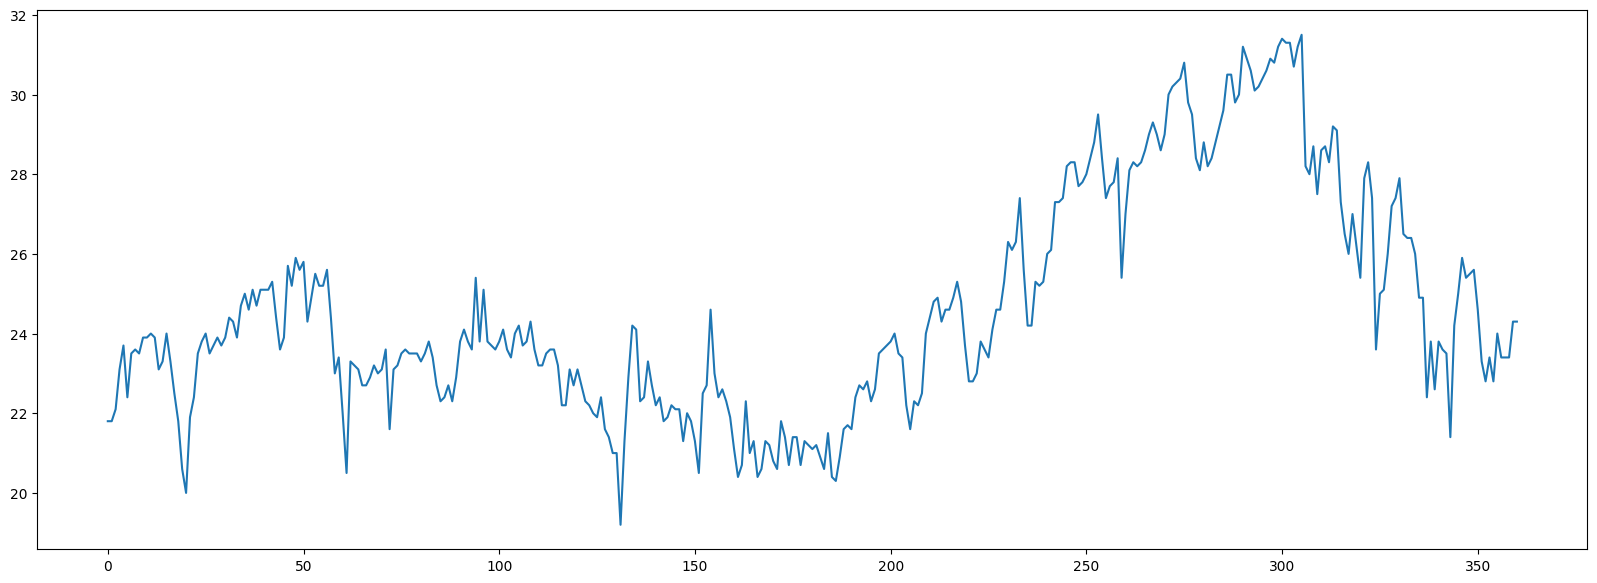

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(df['target'])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_test

array([[28.6, 29. , 29.3, 29. , 28.6],
       [29. , 29.3, 29. , 28.6, 29. ],
       [29.3, 29. , 28.6, 29. , 30. ],
       [29. , 28.6, 29. , 30. , 30.2],
       [28.6, 29. , 30. , 30.2, 30.3],
       [29. , 30. , 30.2, 30.3, 30.4],
       [30. , 30.2, 30.3, 30.4, 30.8],
       [30.2, 30.3, 30.4, 30.8, 29.8],
       [30.3, 30.4, 30.8, 29.8, 29.5],
       [30.4, 30.8, 29.8, 29.5, 28.4],
       [30.8, 29.8, 29.5, 28.4, 28.1],
       [29.8, 29.5, 28.4, 28.1, 28.8],
       [29.5, 28.4, 28.1, 28.8, 28.2],
       [28.4, 28.1, 28.8, 28.2, 28.4],
       [28.1, 28.8, 28.2, 28.4, 28.8],
       [28.8, 28.2, 28.4, 28.8, 29.2],
       [28.2, 28.4, 28.8, 29.2, 29.6],
       [28.4, 28.8, 29.2, 29.6, 30.5],
       [28.8, 29.2, 29.6, 30.5, 30.5],
       [29.2, 29.6, 30.5, 30.5, 29.8],
       [29.6, 30.5, 30.5, 29.8, 30. ],
       [30.5, 30.5, 29.8, 30. , 31.2],
       [30.5, 29.8, 30. , 31.2, 30.9],
       [29.8, 30. , 31.2, 30.9, 30.6],
       [30. , 31.2, 30.9, 30.6, 30.1],
       [31.2, 30.9, 30.6,

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X)
y_pred

array([22.07740021, 22.01440618, 21.92679186, 22.17013426, 22.99605053,
       23.5234291 , 22.49342863, 23.48537789, 23.55747929, 23.50965764,
       23.84557329, 23.88002276, 23.98538472, 23.91113846, 23.25400927,
       23.41576896, 23.96468757, 23.36109237, 22.70103968, 22.0976586 ,
       21.0397452 , 20.4431641 , 21.93084361, 22.27221277, 23.24630463,
       23.57298136, 23.87620744, 23.52191032, 23.74178301, 23.90076146,
       23.73443209, 23.903102  , 24.32764969, 24.25678293, 23.9455006 ,
       24.63409751, 24.88294392, 24.57409085, 25.02168591, 24.70069621,
       25.05865193, 25.04313858, 25.06724425, 25.23592669, 24.4909895 ,
       23.82200903, 24.02898282, 25.48359267, 25.03536297, 25.7019276 ,
       25.49267444, 25.73675743, 24.46425685, 24.98411984, 25.41112763,
       25.15253913, 25.15459559, 25.51343448, 24.51361413, 23.33838756,
       23.61659404, 22.339831  , 21.00714605, 23.25345273, 23.07484922,
       23.0470087 , 22.74528027, 22.82169903, 22.96290657, 23.20

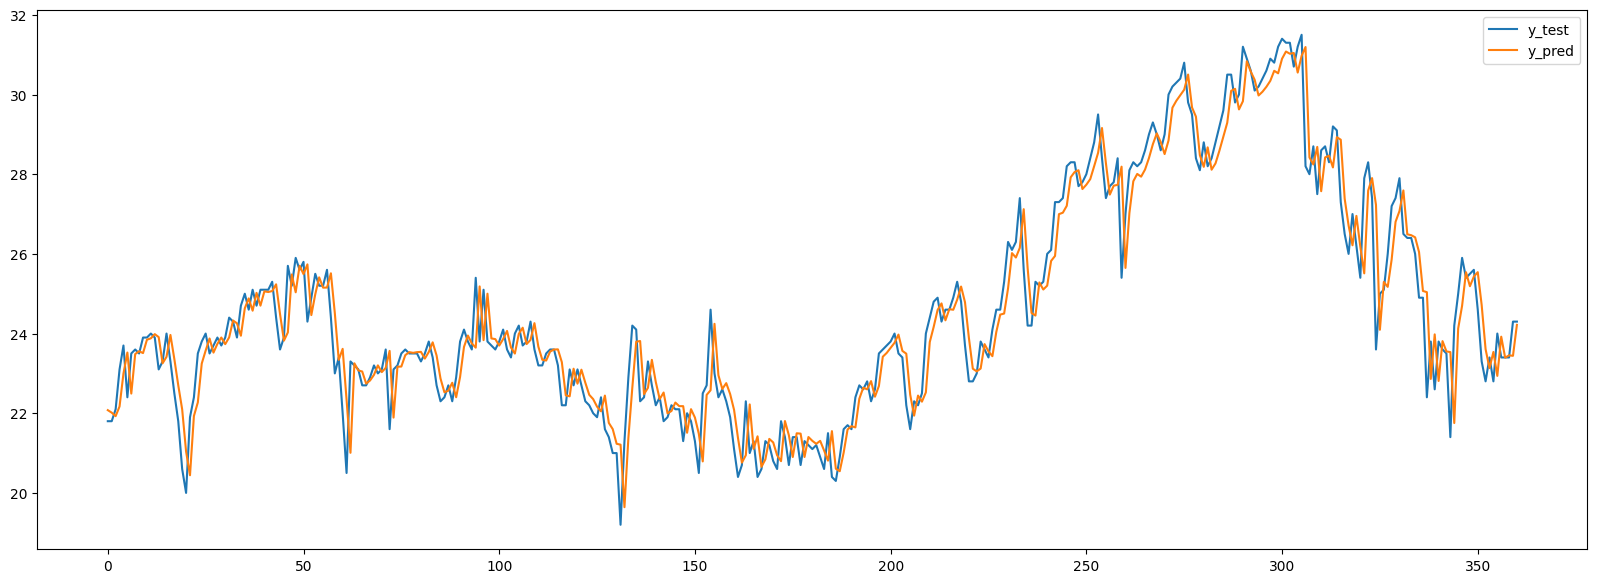

In [25]:
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

In [26]:
y_pred = np.append(y_pred, y_pred[0])
y_pred = y_pred[1:]
y_pred

array([22.01440618, 21.92679186, 22.17013426, 22.99605053, 23.5234291 ,
       22.49342863, 23.48537789, 23.55747929, 23.50965764, 23.84557329,
       23.88002276, 23.98538472, 23.91113846, 23.25400927, 23.41576896,
       23.96468757, 23.36109237, 22.70103968, 22.0976586 , 21.0397452 ,
       20.4431641 , 21.93084361, 22.27221277, 23.24630463, 23.57298136,
       23.87620744, 23.52191032, 23.74178301, 23.90076146, 23.73443209,
       23.903102  , 24.32764969, 24.25678293, 23.9455006 , 24.63409751,
       24.88294392, 24.57409085, 25.02168591, 24.70069621, 25.05865193,
       25.04313858, 25.06724425, 25.23592669, 24.4909895 , 23.82200903,
       24.02898282, 25.48359267, 25.03536297, 25.7019276 , 25.49267444,
       25.73675743, 24.46425685, 24.98411984, 25.41112763, 25.15253913,
       25.15459559, 25.51343448, 24.51361413, 23.33838756, 23.61659404,
       22.339831  , 21.00714605, 23.25345273, 23.07484922, 23.0470087 ,
       22.74528027, 22.82169903, 22.96290657, 23.20124767, 23.03

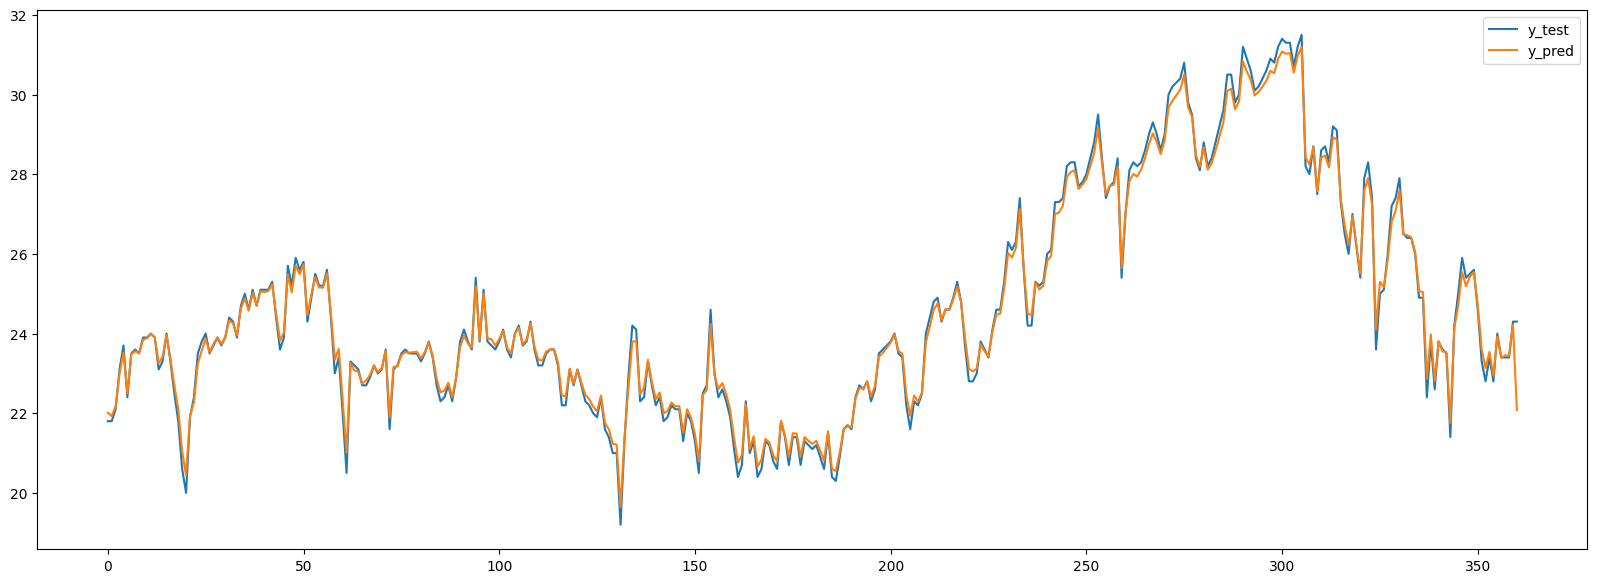

In [27]:
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

In [28]:
def forecast(df):
    lag1 = (df['lag2'].iloc[-1])
    lag2 = (df['lag3'].iloc[-1])
    lag3 = (df['lag4'].iloc[-1])
    lag4 = (df['lag5'].iloc[-1])
    lag5 = (df['target'].iloc[-1])
    y_pred = model.predict([[lag1, lag2, lag3, lag4, lag5]])
    new_row = pd.DataFrame({'lag1': [lag1], 'lag2': [lag2], 'lag3': [lag3], 'lag4': [lag4], 'lag5': [lag5], 'target': y_pred})
    df = pd.concat([df, new_row], ignore_index=True)
    return df

In [29]:
for i in range(100):
    df = forecast(df)
df

,lag1,lag2,lag3,lag4,lag5,target
0,24.500000,24.200000,22.100000,22.400000,21.800000,21.800000
1,24.200000,22.100000,22.400000,21.800000,21.800000,21.800000
2,22.100000,22.400000,21.800000,21.800000,21.800000,22.100000
3,22.400000,21.800000,21.800000,21.800000,22.100000,23.100000
4,21.800000,21.800000,21.800000,22.100000,23.100000,23.700000
...,...,...,...,...,...,...
456,24.506805,24.507668,24.508509,24.509326,24.510123,24.510898
457,24.507668,24.508509,24.509326,24.510123,24.510898,24.511652
458,24.508509,24.509326,24.510123,24.510898,24.511652,24.512386
459,24.509326,24.510123,24.510898,24.511652,24.512386,24.513100


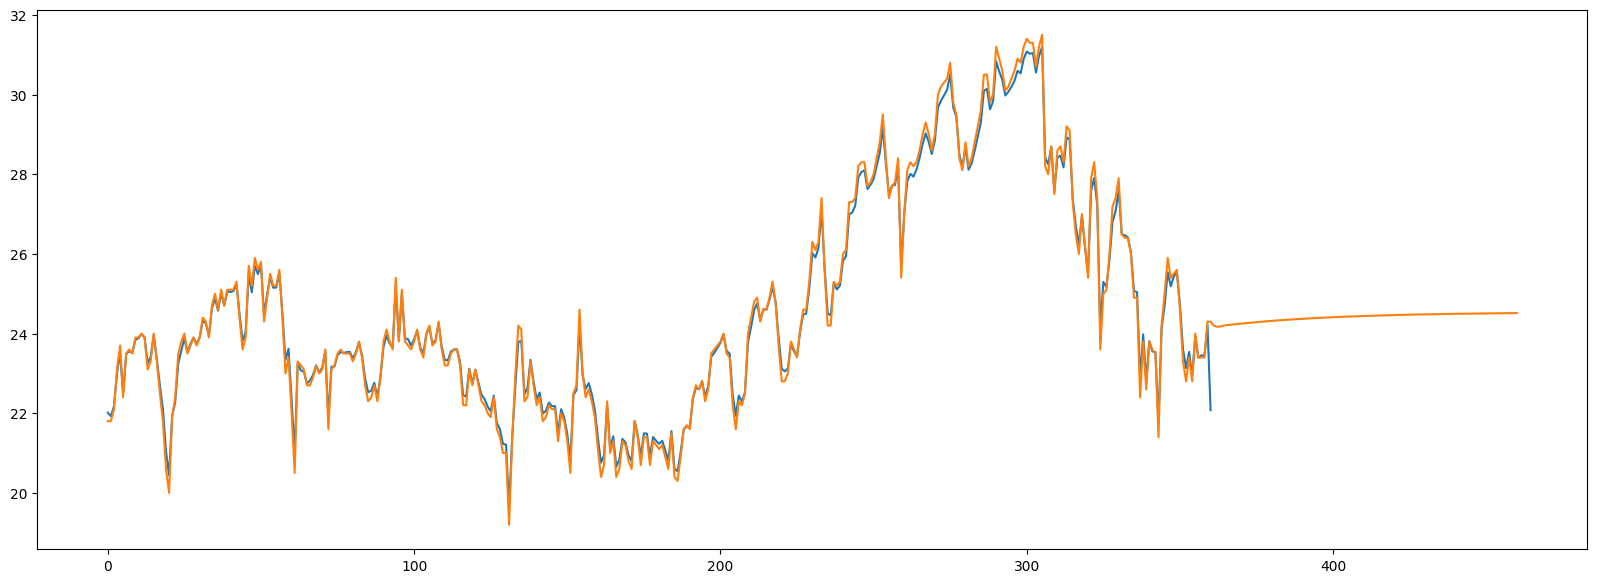

In [30]:
plt.figure(figsize=(20, 7))
plt.plot(y_pred)
plt.plot(df['target'])
plt.show()

In [31]:
xyz

NameError: name 'xyz' is not defined

(272,)

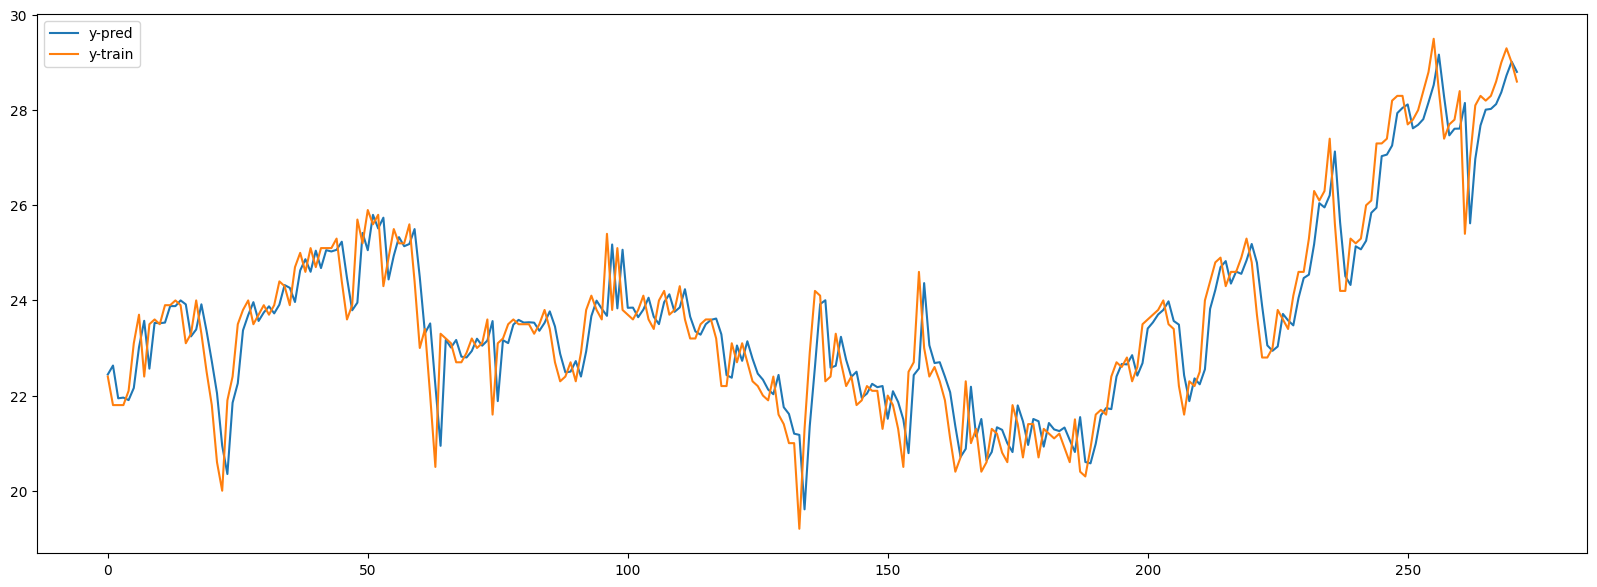

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('temp_data_with_lags.csv')
# display(df)

X = df.drop(['target'], axis='columns')
y = df['target']
# display(X)
# display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
# display(X_train.shape)
# display(y_train.shape)
# display(X_test.shape)
# display(y_test.shape)
        
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# model = Sequential()
# model.add(Input((3, 1)))
# model.add(LSTM(64))
# model.add(Dense(32, 'relu'))
# model.add(Dense(32, 'relu'))
# model.add(Dense(1, 'linear'))
# model.compile(loss='mse', optimizer=Adam(learning_rate=0.0000000001))
# model.fit(X_train, y_train, epochs=10, verbose=0)
# y_pred = model.predict(X_train, verbose=0)

# display(y_pred)
display(y_pred.shape)

plt.figure(figsize=(20, 7))
plt.plot(y_pred)
plt.plot(y_train)
plt.legend(['y-pred', 'y-train'])
plt.show()